In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('monthly-cola-production-in-austr.csv')

In [5]:
df

,Month,Monthly cola production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [15]:
df['yearMonth'] = df['Month'].astype(str)+'-01'
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly cola production  476 non-null    float64
 2   yearMonth                476 non-null    object 
dtypes: float64(1), object(2)
memory usage: 11.3+ KB
None


In [17]:
df

,Month,Monthly cola production,yearMonth
0,1956-01,93.2,1956-01-01
1,1956-02,96.0,1956-02-01
2,1956-03,95.2,1956-03-01
3,1956-04,77.1,1956-04-01
4,1956-05,70.9,1956-05-01
...,...,...,...
471,1995-04,127.0,1995-04-01
472,1995-05,151.0,1995-05-01
473,1995-06,130.0,1995-06-01
474,1995-07,119.0,1995-07-01


In [25]:
#YearMonth is a type object-we may have problem later , so convert it into datetime
df['yearMonth'] = pd.to_datetime(df['Month'].astype(str)+"-01")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    476 non-null    object        
 1   Monthly cola production  476 non-null    float64       
 2   yearMonth                476 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.3+ KB
None
     Month  Monthly cola production  yearMonth
0  1956-01                     93.2 1956-01-01
1  1956-02                     96.0 1956-02-01
2  1956-03                     95.2 1956-03-01
3  1956-04                     77.1 1956-04-01
4  1956-05                     70.9 1956-05-01


In [27]:
df

,Month,Monthly cola production,yearMonth
0,1956-01,93.2,1956-01-01
1,1956-02,96.0,1956-02-01
2,1956-03,95.2,1956-03-01
3,1956-04,77.1,1956-04-01
4,1956-05,70.9,1956-05-01
...,...,...,...
471,1995-04,127.0,1995-04-01
472,1995-05,151.0,1995-05-01
473,1995-06,130.0,1995-06-01
474,1995-07,119.0,1995-07-01


In [29]:
df.set_index('yearMonth',inplace=True)

In [31]:
df

,Month,Monthly cola production
yearMonth,,
1956-01-01,1956-01,93.2
1956-02-01,1956-02,96.0
1956-03-01,1956-03,95.2
1956-04-01,1956-04,77.1
1956-05-01,1956-05,70.9
...,...,...
1995-04-01,1995-04,127.0
1995-05-01,1995-05,151.0
1995-06-01,1995-06,130.0


<Axes: xlabel='yearMonth', ylabel='Monthly cola production'>

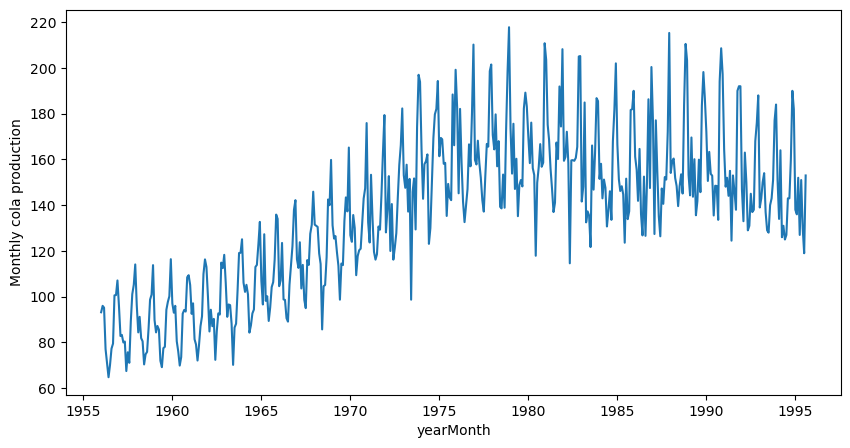

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df['Monthly cola production'])

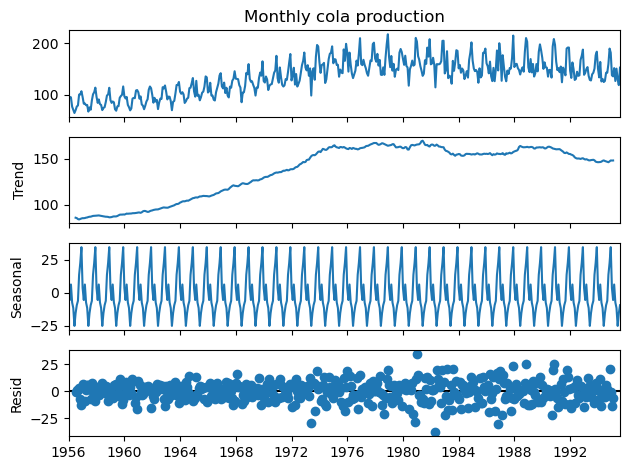

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Monthly cola production'],period=12)
fig = decomposition.plot()

In [39]:
#Calculate and plot rolling mean  and standard deviation for 12 months
df['rollMean'] = df['Monthly cola production'].rolling(window=12).mean()
df['rollStd'] = df['Monthly cola production'].rolling(window=12).std()

In [41]:
df['rollMean'].head(15)

yearMonth
1956-01-01          NaN
1956-02-01          NaN
1956-03-01          NaN
1956-04-01          NaN
1956-05-01          NaN
1956-06-01          NaN
1956-07-01          NaN
1956-08-01          NaN
1956-09-01          NaN
1956-10-01          NaN
1956-11-01          NaN
1956-12-01    86.041667
1957-01-01    86.266667
1957-02-01    85.166667
1957-03-01    84.175000
Name: rollMean, dtype: float64

In [43]:
df['rollStd'].head(15)

yearMonth
1956-01-01          NaN
1956-02-01          NaN
1956-03-01          NaN
1956-04-01          NaN
1956-05-01          NaN
1956-06-01          NaN
1956-07-01          NaN
1956-08-01          NaN
1956-09-01          NaN
1956-10-01          NaN
1956-11-01          NaN
1956-12-01    14.264798
1957-01-01    14.408541
1957-02-01    14.098442
1957-03-01    13.742577
Name: rollStd, dtype: float64

<Axes: xlabel='yearMonth', ylabel='Monthly cola production'>

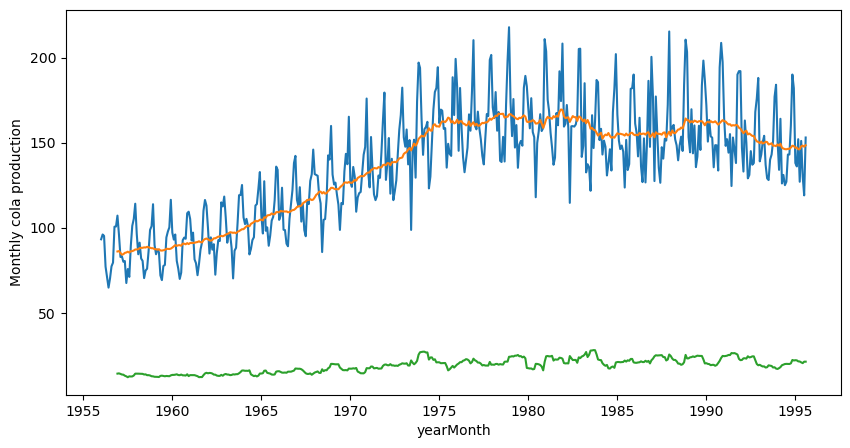

In [45]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df['Monthly cola production'])
sns.lineplot(data=df,x=df.index,y=df.rollMean)
sns.lineplot(data=df,x=df.index,y=df.rollStd)

In [47]:
#Now let us perform the ADF test
from statsmodels.tsa.stattools import adfuller

In [51]:
adfTest = adfuller(df['Monthly cola production'])
print(adfTest)  # let us interpret these values below by converting into a series

(-2.2826614187875727, 0.17762099829132655, 17, 458, {'1%': -3.4447087976702284, '5%': -2.867871300049488, '10%': -2.5701423432047443}, 3463.9034375936567)
